# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [20]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [21]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [22]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1).astype('float32')
x_Test = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1).astype('float32')
print('x_train_image_shape={}'.format(x_train_image.shape))
print('x_test_image_shape={}'.format(x_train_image.shape))

x_train_image_shape=(60000, 28, 28)
x_test_image_shape=(60000, 28, 28)


In [23]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [24]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [26]:
#建立模型

In [27]:
model = Sequential()
#set a cnn network
model.add(Conv2D(filters = 16, kernel_size = (5, 5), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 36, kernel_size = (5, 5), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# 訓練模型

In [28]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [29]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 35s 731us/step - loss: 0.2288 - accuracy: 0.9295 - val_loss: 0.0547 - val_accuracy: 0.9834
Epoch 2/10
48000/48000 [==============================] - 39s 805us/step - loss: 0.0889 - accuracy: 0.9739 - val_loss: 0.0507 - val_accuracy: 0.9858
Epoch 3/10
48000/48000 [==============================] - 41s 847us/step - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.0404 - val_accuracy: 0.9878
Epoch 4/10
48000/48000 [==============================] - 42s 866us/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0340 - val_accuracy: 0.9904
Epoch 5/10
48000/48000 [==============================] - 44s 921us/step - loss: 0.0463 - accuracy: 0.9865 - val_loss: 0.0327 - val_accuracy: 0.9910
Epoch 6/10
48000/48000 [==============================] - 41s 859us/step - loss: 0.0425 - accuracy: 0.9872 - val_loss: 0.0368 - val_accuracy: 0.9899
Epoch 7/10
48000/48000 [==============================] 

# 以圖形顯示訓練過程

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

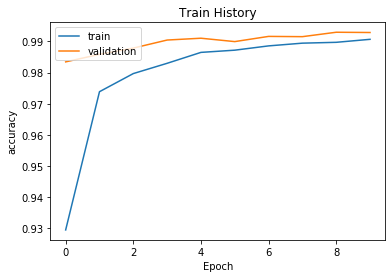

In [36]:
show_train_history(train_history,'accuracy','val_accuracy')

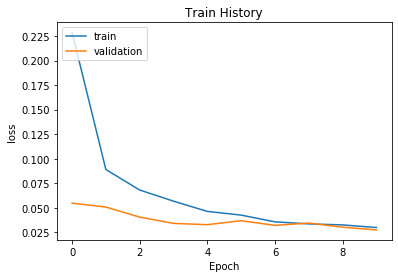

In [37]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [38]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 223us/step

accuracy= 0.993399977684021
